# **Lennard-Jones gas**

In this code we simulate ...

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)


This notebook follows the next order
* [1. Computational scheme](#sec_1)

# **Import libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ECond.simulation.solver as solver
import ECond.simulation.animation as ani

from datetime import datetime

# **Sections**

## **Some ideas**

* Only calculate forces for the moving particles (electrons)

## **1. Computational scheme** <a class="anchor" id="sec_1"></a>

The Coulomb's force of a ith particle due to the presence of a jth particle is given by
$$\vec{F}_i^{\,(Coulomb)} = \frac{1}{4\pi\epsilon_0}\frac{q_i q_j}{r_{ij}^3}\vec{r}_{ij}$$
where $\vec{r}_{ij}=\vec{r}_i-\vec{r}_j$ Now, the Lorentz force of a ith particle due to the presence of the external fields $\vec{E}$ and $\vec{B}$ is
$$\vec{F}_i^{\,(Lorentz)} = q_i\left(\vec{E} + \vec{v}_i\times\vec{B} \right)\,,$$
where $\vec{v}_i$ is the velocity of the ith particle.


For implementing this equations into the code we define the next dimensionless quantities:
$$\bar{t}=\sqrt{\frac{e^2}{4\pi\epsilon_0 m_e\sigma^3}}t\,,$$
$$ \vec{r}' = \frac{\vec{r}}{\sigma}\,,$$
$$ \vec{v}' = \frac{d\vec{r}'}{d\bar{t}}$$
$$ \bar{r}_{ij} =\frac{r_{ij}}{\sigma}\,, $$
$$\bar{q}_i = \frac{q_i}{e}$$
where $\sigma=361.5\times 10^{-12}[\text{m}]$ is the lattice constant cristal structure of copper, $e$ is the elemental charge and $m_e$ is the electron rest mass. We also define the next dimensionless fields

$$\vec{E}' = \frac{4\pi\epsilon_0 \sigma^2}{e}\vec{E}$$
$$\vec{B}' = \sqrt{\frac{4\pi\epsilon_0\sigma^3}{m_e}} \vec{B}$$

With this definitions the Newton's Law of motion for the electrons is left as
$$ \frac{d^2\vec{r}'_{i}}{d \bar{t}^2}=\sum\limits_{j=1}^{N} \frac{\bar{q}_i \bar{q}_j}{\bar{r}_{ij}^2}\hat{r}'_{ij} + \bar{q}_i\left(\vec{E}'+\vec{v}'_i\times\vec{B}' \right) \,.$$ 

## **2. Test**

In [2]:
# Choose parameters 
h = 0.01; N = 500; R0=0.35; n=6

# Set intial conditions
#free charges
X0 = np.array([-0.5,-0.5, 0.5, 0.5, 0.5])
Y0 = np.array([ 0.0, 1.0, 0.0,-1.0, 1.0])
Vx0 = np.array([-1, 0, 1, 1, 2])
Vy0 = np.array([ 1,-1, 0,-1, 0])
Np = len(X0)
Q = -np.ones(Np)

#nuclei
t = np.arange(-4,5,1)
XC, YC  = np.meshgrid(t,t)
XC = XC.flatten()
YC = YC.flatten()
QC = np.ones(len(XC))

# Set external fields
def B0(X,Y,t):
    return X*0 #In order: [Bz]

def E0(X,Y,t):
     return [X*0, X*0] #In order: [Ex, Ey]

def B1(X,Y,t): 
     return X*0 - 10

def E1(X,Y,t):
     return [X*0, (Y>=-4)*(Y<=4)*(-1)] #In order: [Ex, Ey]

sim = solver.ECond(h,N,Np,E0,B0,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

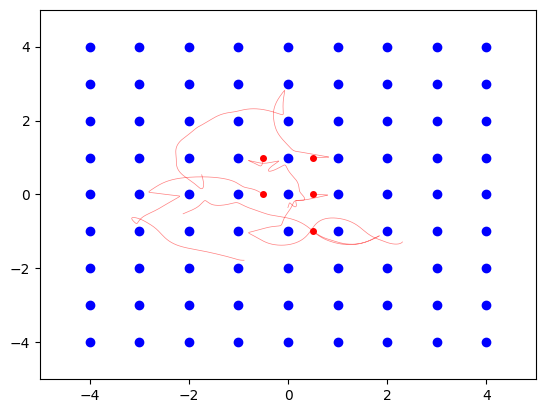

In [3]:
%matplotlib inline

for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')

D=5
plt.xlim(-D,D)
plt.ylim(-D,D)
plt.show()

In [4]:
%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5.0,0.5],length=8,interval=0)
#plt.show()

Using matplotlib backend: <object object at 0x0000023F1EB1B4F0>
Using matplotlib backend: QtAgg


In [12]:
X1 = np.array([1,2,3])
X2 = np.array([4,5,6,7,8,9])
X = np.concatenate([X1,X2])

A, B = np.meshgrid(X1,X); dX = A-B
display(dX)
display(np.sum(dX,axis=0))

A, B = np.meshgrid(X1,X1); dX1 = A-B
display(dX1)

A, B = np.meshgrid(X1,X2); dX2 = A-B
display(dX2)

display(np.sum(dX1,axis=0)+np.sum(dX2,axis=0))

array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0],
       [-3, -2, -1],
       [-4, -3, -2],
       [-5, -4, -3],
       [-6, -5, -4],
       [-7, -6, -5],
       [-8, -7, -6]])

array([-36, -27, -18])

array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0]])

array([[-3, -2, -1],
       [-4, -3, -2],
       [-5, -4, -3],
       [-6, -5, -4],
       [-7, -6, -5],
       [-8, -7, -6]])

array([-36, -27, -18])

In [25]:
I = np.eye(4)
display(I)
display(I[:,:1])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

array([[1.],
       [0.],
       [0.],
       [0.]])

In [15]:
Q = -np.ones(3)
QC = np.ones(4)

A,B = np.meshgrid(Q,Q)
display(A*B)

A,B = np.meshgrid(Q,QC)
display(A*B)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

## **3. Random particles in a squared network**

In [6]:
def uniques(X0,Y0):
    Pos = []
    for i in range(len(X0)):
        Pos.append([X0[i],Y0[i]])
    Pos = np.array(Pos)
    Pos = np.unique(Pos,axis=0)
    return Pos[:,0], Pos[:,1]

In [7]:
# Choose parameters 
h = 0.01; N = 1000; Np = 15; R0=0.35; n=6

# Set intial conditions
np.random.seed(14955)

#free charges
X0, Y0 = uniques(np.random.randint(-3,3,Np)+0.5, np.random.randint(-3,3,Np)+0.5)
Np = len(X0) 
Vx0 = np.random.randint(-4,4,Np)*0.5
Vy0 = np.random.randint(-4,4,Np)*0.5
Q = -np.ones(Np)

#nuclei
t = np.arange(-3,4,1)
XC, YC  = np.meshgrid(t,t)
XC = XC.flatten()
YC = YC.flatten()
QC = np.ones(len(XC))

# Set external fields
def B0(X,Y,t): return X*0 #In order: [Bz]
def B1(X,Y,t): return X*0 - 1

def E0(X,Y,t): return [X*0, X*0] #In order: [Ex, Ey]
def E1(X,Y,t): return [X*0, (Y>=-4)*(Y<=4)*(-1)]
def E2(X,Y,t): return [X*0, X*0 - 1]

sim = solver.ECond(h,N,Np,E2,B1,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

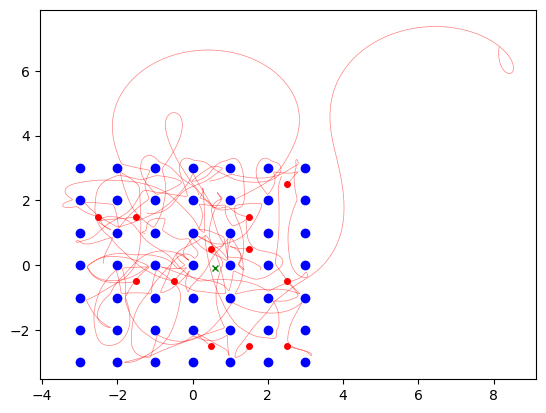

In [8]:
%matplotlib inline

for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')
plt.plot(np.mean(X0),np.mean(Y0),'xg',ms=5)
#D=5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [9]:
%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5.0,0.5],length=8,interval=0,dj=2,j0=1)
#plt.show()

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


## **4. Random particles in a like-hexagonal mesh**

In [2]:
def uniques(X0,Y0):
    Pos = []
    for i in range(len(X0)):
        Pos.append([X0[i],Y0[i]])
    Pos = np.array(Pos)
    Pos = np.unique(Pos,axis=0)
    return Pos[:,0], Pos[:,1]

In [23]:
# Choose parameters 
h = 0.01; N = 1000; Np = 20; R0=0.35; n=6

# Set intial conditions
np.random.seed(14955)

#nuclei
a = 1 # Lattice constant
b = np.sqrt(3)/2*a
t = np.arange(-3,4,1.)
XC, YC  = np.meshgrid(t*b,t*a)
v = np.arange(1,1+YC.shape[0],1)
YC += (np.meshgrid(v,v)[0]%2==0)*a/2
XC = XC.flatten()
YC = YC.flatten()
QC = np.ones(len(XC))

#free charges
X0, Y0 = uniques(np.random.randint(-3,3,Np)*b+b/2, np.random.randint(-3,3,Np)*a+a/2)
Np = len(X0) 
Vx0 = np.random.randint(-4,4,Np)*0.5
Vy0 = np.random.randint(-4,4,Np)*0.5
Q = -np.ones(Np)

# Set external fields
def B0(X,Y,t): return X*0 #In order: [Bz]
def B1(X,Y,t): return X*0 - 1

def E0(X,Y,t): return [X*0, X*0] #In order: [Ex, Ey]
def E1(X,Y,t): return [X*0, (Y>=-4)*(Y<=4)*(-1)]
def E2(X,Y,t): return [X*0, X*0 - 1]

sim = solver.ECond(h,N,Np,E0,B0,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

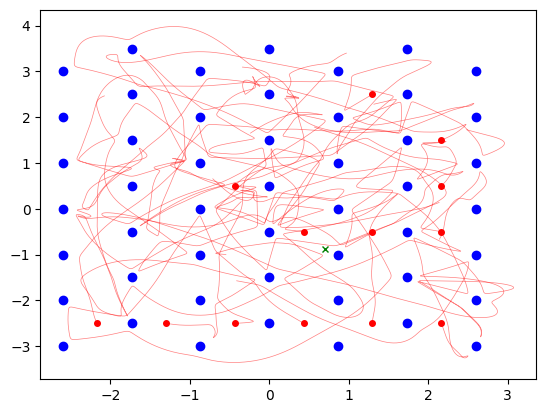

In [24]:
%matplotlib inline

for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')
plt.plot(np.mean(X0),np.mean(Y0),'xg',ms=5)
#D=5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [5]:
#Density of electrons animation

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=1,save=False,name='test.mp4',verbose=False,plot_params=['or','or',5,15,0.04],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: <object object at 0x000001186F6D74F0>
Using matplotlib backend: QtAgg


In [11]:
#Density of electrons animation 2

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=2,save=False,name='test.mp4',verbose=False,plot_params=['-r','or',20,15,0.01],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [5]:
# Dynamic animation

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=0,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5,0.5],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: <object object at 0x000001BC4D5BB4F0>
Using matplotlib backend: QtAgg


In [25]:
display((np.mean(X0), np.mean(Y0)))
display((np.mean(Vx0), np.mean(Vy0)))

(0.6994820569028157, -0.8846153846153846)

(0.07692307692307693, 0.2692307692307692)

In [36]:
t = np.arange(-3,4,1.)
XC, YC  = np.meshgrid(t,t)
display(YC)
display(np.arange(1,1+YC.shape[0],1))
v = np.arange(1,1+YC.shape[0],1)
M = (np.meshgrid(v,v)[0]%2==0)*a/2
display(M)

array([[-3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]])

array([1, 2, 3, 4, 5, 6, 7])

array([[0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0.5, 0. ]])

(-4.0, 4.0)

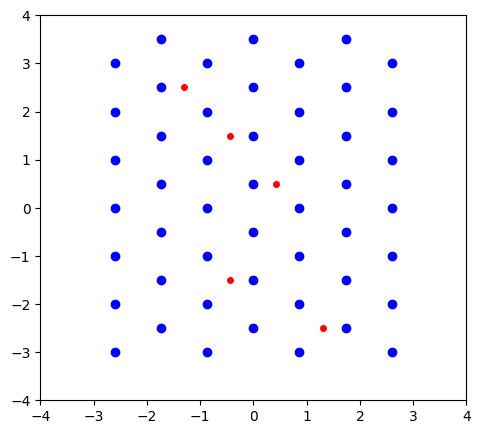

In [20]:
#nuclei
a = 1 # Lattice constant
b = np.sqrt(3)/2*a
t = np.arange(-3,4,1.)
XC, YC  = np.meshgrid(t*b,t*a)
v = np.arange(1,1+YC.shape[0],1)
YC += (np.meshgrid(v,v)[0]%2==0)*a/2
XC = XC.flatten()
YC = YC.flatten()

#particles
Np = 5
X0, Y0 = uniques(np.random.randint(-3,3,Np)*b+b/2, np.random.randint(-3,3,Np)*a+a/2)

%matplotlib inline
plt.figure(figsize=(5.5,5))
plt.plot(XC,YC,'ob')
plt.plot(X0,Y0,'or',ms=4)
plt.xlim(-4,4)
plt.ylim(-4,4)

In [10]:
XC[0:2]

array([-2.59807621, -1.73205081])

## **5. Random particles in a wire**

In [4]:
def uniques(X0,Y0):
    Pos = []
    for i in range(len(X0)):
        Pos.append([X0[i],Y0[i]])
    Pos = np.array(Pos)
    Pos = np.unique(Pos,axis=0)
    return Pos[:,0], Pos[:,1]

16

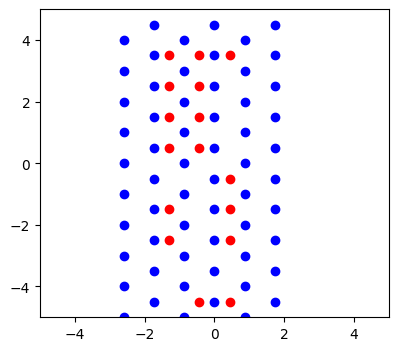

(-0.48713928962874675, 0.125)

(-0.125, 0.0)

In [345]:
# Set intial positions
np.random.seed(14955)

#nuclei
a = 1        # Lattice constant
coef = 10/10  # Compactification coefficient

b = np.sqrt(3)/2*a*coef
tx = np.arange(-3,3,1.); ty = np.arange(-5,5,1.)
XC, YC  = np.meshgrid(tx*b,ty*a)
vx = np.arange(1,1+YC.shape[1],1)
vy = np.arange(1,1+YC.shape[0],1)
YC += (np.meshgrid(vx,vy)[0]%2==0)*a/2
XC = XC.flatten()
YC = YC.flatten()
QC = np.ones(len(XC))

#free charges
Np = 20
mode = 1

i0 = int(tx[0])+1
i1 = int(tx[-1])-1
j0 = int(ty[0]) 
j1 = int(ty[-1])
if mode==1:  X0, Y0 = uniques(np.random.randint(i0,i1,Np)*b+b/2, np.random.randint(j0,j1,Np)*a+a/2)
elif mode==2: X0, Y0 = uniques(np.random.randint(i0+1,i1-1,Np)*2*b+b, np.random.randint(j0,j1,Np)*a+a/2)
Np = len(X0) 
A = 6 
Vx0 = np.random.randint(-A,A,Np)*0.25
Vy0 = np.random.randint(-A,A,Np)*0.25

display(Np)

%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
plt.plot(X0,Y0,'or')
D = 5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

display((np.mean(X0),np.mean(Y0)))
display((np.mean(Vx0),np.mean(Vy0)))

In [346]:
# Choose parameters 
h = 0.01; N = 2000; R0=0.35; n=5

# Set intial conditions
Q = -np.ones(Np)

# Set external fields
def B0(X,Y,t): return X*0 #In order: [Bz]
def B1(X,Y,t): return X*0 - 1

def E0(X,Y,t): return [X*0, X*0] #In order: [Ex, Ey]
def E1(X,Y,t): return [X*0, (Y>=-4)*(Y<=4)*(-1)]
def E2(X,Y,t): return [X*0, X*0 - 1]

sim = solver.ECond(h,N,Np,E0,B0,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

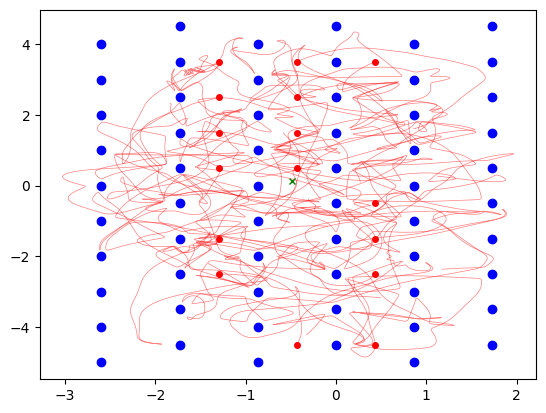

In [347]:
%matplotlib inline

for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')
plt.plot(np.mean(X0),np.mean(Y0),'xg',ms=5)
#D=5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [348]:
np.mean(np.sqrt(Vx0**2+Vy0**2)), np.mean(np.sqrt(s[2][:,-1]**2+s[3][:,-1]**2))

(1.006282336812121, 1.13969600618101)

In [350]:
# Dynamic animation

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=0,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5,0.5],length=8,interval=100,dj=4,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [296]:
#Density of electrons animation 2

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=2,save=False,name='test.mp4',verbose=False,plot_params=['-r','or',20,15,0.01],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


# **6. Random particles in a closed wire**

In [351]:
def uniques(X0,Y0):
    Pos = []
    for i in range(len(X0)):
        Pos.append([X0[i],Y0[i]])
    Pos = np.array(Pos)
    Pos = np.unique(Pos,axis=0)
    return Pos[:,0], Pos[:,1]

20

96

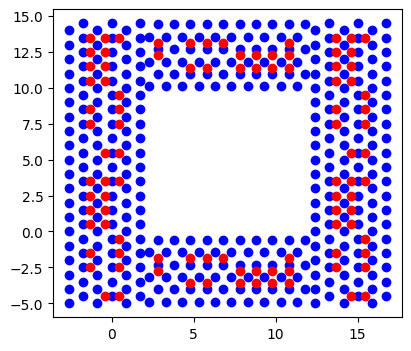

(7.150240473580834, 4.987620236790417)

(-0.14583333333333334, -0.059895833333333336)

In [510]:
# Set intial positions
np.random.seed(14955)

#nuclei
a = 1        # Lattice constant
coef = 10/10  # Compactification coefficient

b = np.sqrt(3)/2*a*coef
tx = np.arange(-3,3,1.); ty = np.arange(-5,5,1.)
XC, YC  = np.meshgrid(tx*b,ty*a)
vx = np.arange(1,1+YC.shape[1],1); vy = np.arange(1,1+YC.shape[0],1)
YC += (np.meshgrid(vx,vy)[0]%2==0)*a/2
XC = XC.flatten(); YC = YC.flatten()

i0 = int(tx[0])+1
i1 = int(tx[-1])-1
j0 = int(ty[0]) 
j1 = int(ty[-1])
XC, YC = np.concatenate([XC,XC,YC+7.3,XC+15,XC+15,YC+7.3]), np.concatenate([YC,YC+j1-j0+1,XC+12.7,YC,YC+j1-j0+1,XC+12.7-15])

QC = np.ones(len(XC))

#free charges
Np = 20

display(Np)

X0, Y0 = uniques(np.random.randint(i0,i1,Np)*b+b/2, np.random.randint(j0,j1,Np)*a+a/2)
X0, Y0 = np.concatenate([X0,X0,Y0+7.3,X0+15,X0+15,Y0+7.3]), np.concatenate([Y0,Y0+j1-j0+1,X0+12.7,Y0,Y0+j1-j0+1,X0+12.7-15])
Np = len(X0) 
A = 6 
Vx0 = np.random.randint(-A,A,Np)*0.25
Vy0 = np.random.randint(-A,A,Np)*0.25

display(Np)

%matplotlib inline
plt.figure(figsize=(4.5,4))
plt.plot(XC,YC,'ob')
plt.plot(X0,Y0,'or')
#plt.plot(XC,YC-15,'og')
D = 15
#plt.xlim(-D+14,D-5); plt.ylim(-D,D-15)
plt.show()

display((np.mean(X0),np.mean(Y0)))
display((np.mean(Vx0),np.mean(Vy0)))

In [516]:
# Choose parameters 
h = 0.01; N = 4500; R0=0.35; n=5

# Set intial conditions
Q = -np.ones(Np)

# Set external fields
def B0(X,Y,t): return X*0 #In order: [Bz]
def B1(X,Y,t): return X*0 - 1

def E0(X,Y,t): return [X*0, X*0] #In order: [Ex, Ey]
def E1(X,Y,t): return [X*0, (X>=-3)*(X<=2.07)*(Y>=0)*(Y<=7.5)*(-3)]
def E2(X,Y,t): return [X*0, X*0 - 1]

sim = solver.ECond(h,N,Np,E1,B0,R0,n)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

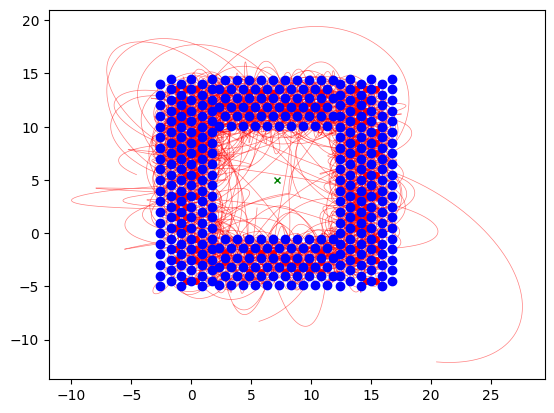

In [517]:
%matplotlib inline

for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,'-r',lw=0.5,alpha=0.5)
    plt.plot(X[0],Y[0],'or',ms=4)
plt.plot(XC,YC,'ob')
plt.plot(np.mean(X0),np.mean(Y0),'xg',ms=5)
#D=5; plt.xlim(-D,D); plt.ylim(-D,D)
plt.show()

In [518]:
np.mean(np.sqrt(Vx0**2+Vy0**2)), np.mean(np.sqrt(s[2][:,-1]**2+s[3][:,-1]**2))

(1.1386264227215108, 1.7465734610079071)

In [519]:
# Dynamic animation

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=0,save=False,name='test.mp4',verbose=True,plot_params=['-r','or',0.2,5,0.5],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [515]:
#Density of electrons animation 2

%matplotlib auto
%matplotlib auto

ani.animate_path(self1,s,kind=2,save=False,name='test.mp4',verbose=False,plot_params=['-r','or',20,15,0.004],length=8,interval=0,dj=5,j0=3)

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg
